<a href="https://colab.research.google.com/github/dhgrassi/Grupo-de-Estudos-DS/blob/main/TCC_Teste_com_Dados_Cargill_Insumo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import pandas as pd
from scipy import stats
from scipy.stats import norm

# importa o data set
from google.colab import files
uploaded = files.upload()


Saving Insumo 3.xlsx to Insumo 3 (2).xlsx


In [50]:
import io
df = pd.read_excel(io.BytesIO(uploaded['Insumo 3.xlsx']))
df

,Date,Nível do Tanque - Insumo 3
0,2022-01-01 06:59:59.995,70.670502
1,2022-01-02 06:59:59.995,45.539421
2,2022-01-03 06:59:59.995,22.955250
3,2022-01-04 06:59:59.995,67.959770
4,2022-01-05 06:59:59.995,55.387604
...,...,...
70,2022-03-12 06:59:59.995,59.964813
71,2022-03-13 06:59:59.995,41.134415
72,2022-03-14 06:59:59.995,21.092470
73,2022-03-15 06:59:59.995,59.777885


In [51]:
!pip install sktime
from sktime.utils.plotting import plot_series

In [52]:
df.head()

,Date,Nível do Tanque - Insumo 3
0,2022-01-01 06:59:59.995,70.670502
1,2022-01-02 06:59:59.995,45.539421
2,2022-01-03 06:59:59.995,22.955250
3,2022-01-04 06:59:59.995,67.959770
4,2022-01-05 06:59:59.995,55.387604


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        75 non-null     datetime64[ns]
 1   Nível do Tanque - Insumo 3  75 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.3 KB


In [54]:
#Setting date as the index
df.set_index('Date', inplace=True, drop=True)

In [55]:
#Nível Insumo 1 column as an object due to error values
#list of non real values
nans = df[~df.applymap(np.isreal).all(1)]
nans

,Nível do Tanque - Insumo 3
Date,


In [56]:
#transforming strings in Nan
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [57]:
#filling Nan values with previous valid number
#df.fillna(method="ffill", inplace="true")
df = df.fillna(df.mean())

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 75 entries, 2022-01-01 06:59:59.995000 to 2022-03-16 06:59:59.995000
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Nível do Tanque - Insumo 3  75 non-null     float64
dtypes: float64(1)
memory usage: 1.2 KB


In [59]:
import matplotlib
matplotlib.style.use('ggplot')

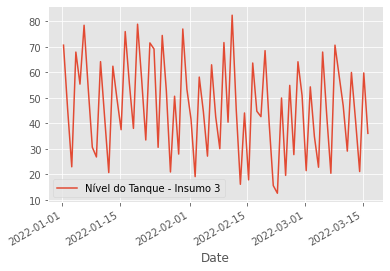

In [60]:
 df.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec0bf4da10>]],
      dtype=object)

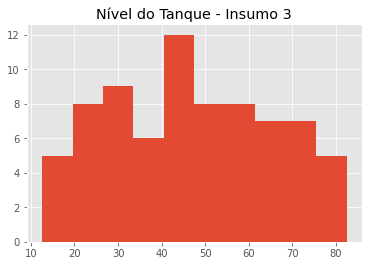

In [61]:
df.hist()

SEPARATING IN TRAIN AND TEST IN ORDER TO EVALUATE PREDICTION MODEL

In [62]:
#First we need to ensure DF frequency is D
df = df.resample('D').mean() 

In [63]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster

In [64]:
df.index

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16',
               '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20',
               '2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24',
               '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28',
               '2022-01-29', '2022-01-30', '2022-01-31', '2022-02-01',
               '2022-02-02', '2022-02-03', '2022-02-04', '2022-02-05',
               '2022-02-06', '2022-02-07', '2022-02-08', '2022-02-09',
               '2022-02-10', '2022-02-11', '2022-02-12', '2022-02-13',
               '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17',
               '2022-02-18', '2022-02-19', '2022-02-20', '2022-02-21',
               '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25',
      

In [93]:
y = df
y_train, y_test = temporal_train_test_split(y, test_size=5)
# we will try to forecast y_test from y_train

70 5


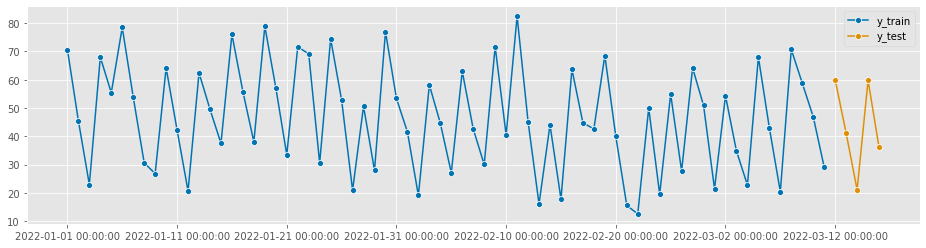

In [96]:
# plotting for illustration
plot_series(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])

In [97]:
# we can simply take the indices from `y_test` where they already are stored
fh = ForecastingHorizon(y_test.index, is_relative=False)
fh

ForecastingHorizon(['2022-03-12', '2022-03-13', '2022-03-14', '2022-03-15',
               '2022-03-16'],
              dtype='datetime64[ns]', freq='D', is_relative=False)

In [98]:
forecaster = NaiveForecaster(strategy="last", sp=12)
forecaster.fit(y_train)
forecaster.predict(fh)

y_pred = forecaster.predict(fh)

/usr/local/lib/python3.7/dist-packages/sktime/forecasting/base/_fh.py:533: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if not hasattr(cutoff, "freqstr") or cutoff.freqstr is None:
/usr/local/lib/python3.7/dist-packages/sktime/forecasting/base/_fh.py:543: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  assert cutoff.freqstr == index.freqstr
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:77: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if hasattr(x, "freqstr"):
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:78: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if x.freqstr is None:
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:80: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  elif "-" in x.freqstr:
/usr/local/lib/python3.7/

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7febff8fa390>)

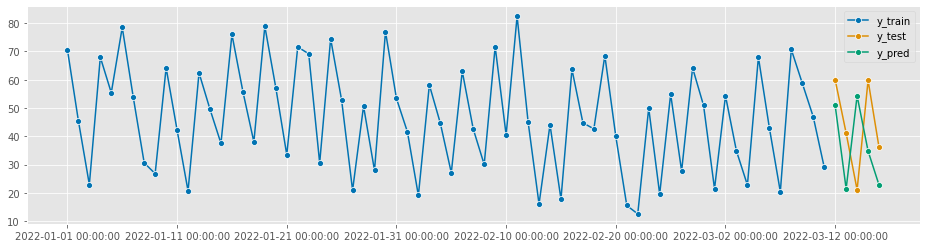

In [99]:
# plotting for illustration
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

In [100]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
# option 1: using the lean function interface
mean_absolute_percentage_error(y_test, y_pred)

0.5306758729800336

In [101]:
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError
# option 2: using the composable class interface
mape = MeanAbsolutePercentageError(symmetric=False)
# evaluation works exactly like in option 2, but with the instantiated object
mape(y_test, y_pred)

0.5981537809626041

/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:77: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if hasattr(x, "freqstr"):
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:78: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if x.freqstr is None:
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:80: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  elif "-" in x.freqstr:
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:83: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  return x.freqstr


0.30673595341799886

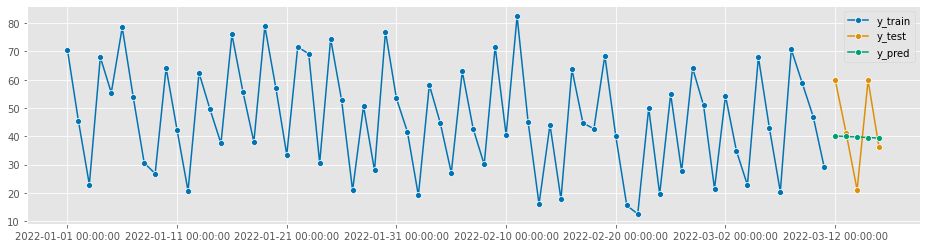

In [121]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

forecaster = ExponentialSmoothing(trend="add")

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_pred, y_test)

/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:77: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if hasattr(x, "freqstr"):
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:78: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if x.freqstr is None:
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:80: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  elif "-" in x.freqstr:
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:83: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  return x.freqstr


0.3264694824250706

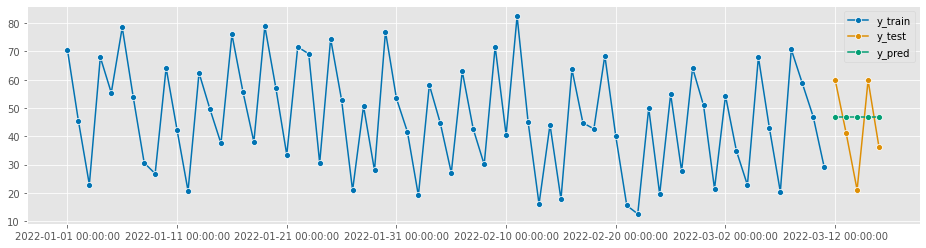

In [103]:
from sktime.forecasting.ets import AutoETS

forecaster = AutoETS(auto=True)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_pred, y_test)

In [104]:
pip install pmdarima

In [105]:
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.model_evaluation import evaluate
from sktime.forecasting.model_selection import ExpandingWindowSplitter

/usr/local/lib/python3.7/dist-packages/sktime/forecasting/base/_fh.py:533: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if not hasattr(cutoff, "freqstr") or cutoff.freqstr is None:
/usr/local/lib/python3.7/dist-packages/sktime/forecasting/base/_fh.py:543: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  assert cutoff.freqstr == index.freqstr
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:77: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if hasattr(x, "freqstr"):
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:78: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if x.freqstr is None:
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:80: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  elif "-" in x.freqstr:
/usr/local/lib/python3.7/

0.29834840367656096

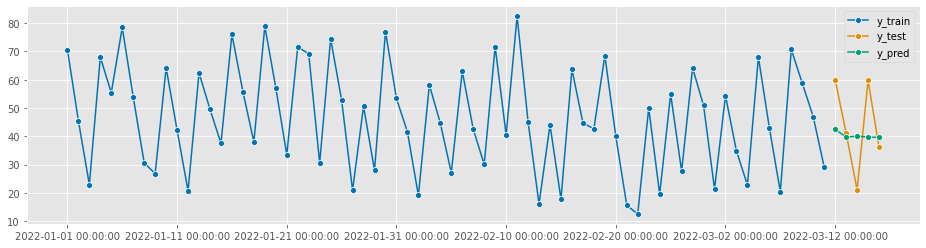

In [118]:
from sktime.forecasting.arima import ARIMA

forecaster = ARIMA(
    order=(1, 1, 1), suppress_warnings=True
)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_pred, y_test)

In [107]:
y_pred


,Nível do Tanque - Insumo 3
2022-03-12,44.618225
2022-03-13,-0.604050
2022-03-14,40.380900
2022-03-15,16.191334
2022-03-16,6.347629


In [108]:
from sklearn.neighbors import KNeighborsRegressor

from sktime.forecasting.compose import make_reduction

/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:105: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  if not hasattr(x, "freq") or x.freq is None:
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:107: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  by *= x.freq
/usr/local/lib/python3.7/dist-packages/sktime/forecasting/base/_fh.py:533: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if not hasattr(cutoff, "freqstr") or cutoff.freqstr is None:
/usr/local/lib/python3.7/dist-packages/sktime/forecasting/base/_fh.py:543: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  assert cutoff.freqstr == index.freqstr
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:77: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if hasattr(x, "freqstr"):
/usr/local/lib/pyt

0.1512867561089266

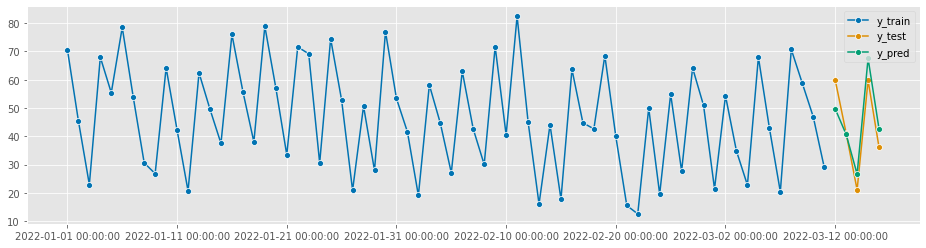

In [116]:
regressor = KNeighborsRegressor(n_neighbors=3)
forecaster = make_reduction(regressor, window_length=4, strategy="recursive")
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_test, y_pred, symmetric=False)